In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
root_path = 'gdrive/My Drive/Colab Notebooks/'

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout, Conv2D, MaxPooling2D
from sklearn.neural_network import MLPClassifier
from keras import utils
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

Using TensorFlow backend.


In [0]:
X_train = np.load("gdrive/My Drive/Colab Notebooks/k49-train-imgs.npz")['arr_0']
y_train = np.load("gdrive/My Drive/Colab Notebooks/k49-train-labels.npz")['arr_0']
X_test = np.load("gdrive/My Drive/Colab Notebooks/k49-test-imgs.npz")['arr_0']
y_test = np.load("gdrive/My Drive/Colab Notebooks/k49-test-labels.npz")['arr_0']


In [0]:
#X_train1 = X_train[:60000]
#X_test1 = X_test[:1000]
#y_train1 = y_train[:60000]
#y_test1 = y_test[:1000]
X_train1 = X_train
X_test1 = X_test
y_train1 = y_train
y_test1 = y_test
X_train1 = X_train1/255
X_test1 = X_test1/255
y_train1 = utils.to_categorical(y_train1, 49)
y_test1 = utils.to_categorical(y_test1, 49)
#для персептронов
#X_train1 = np.reshape(X_train1, (X_train1.shape[0], 28*28))
#X_test1 = np.reshape(X_test1, (X_test1.shape[0], 28*28))
#для сверточной
X_train1 = X_train1.reshape(-1, 28,28, 1)
X_test1 = X_test1.reshape(-1, 28,28, 1)

In [0]:
counts = np.bincount(y_train)
counts += np.bincount(y_test)
# print(counts.shape)
# печатаем частоты рядом с ответами 
for count in enumerate(counts): 
    print(count) 


(0, 7000)
(1, 7000)
(2, 7000)
(3, 903)
(4, 7000)
(5, 7000)
(6, 7000)
(7, 7000)
(8, 5481)
(9, 7000)
(10, 7000)
(11, 7000)
(12, 7000)
(13, 4843)
(14, 4496)
(15, 7000)
(16, 2983)
(17, 7000)
(18, 7000)
(19, 7000)
(20, 7000)
(21, 7000)
(22, 2399)
(23, 2850)
(24, 7000)
(25, 7000)
(26, 5968)
(27, 7000)
(28, 7000)
(29, 2317)
(30, 7000)
(31, 3558)
(32, 1998)
(33, 3946)
(34, 7000)
(35, 7000)
(36, 1858)
(37, 7000)
(38, 7000)
(39, 7000)
(40, 7000)
(41, 7000)
(42, 2487)
(43, 2787)
(44, 485)
(45, 456)
(46, 7000)
(47, 7000)
(48, 4097)


In [0]:
def create_model(dropout_rate_1=0, dropout_rate_2=0, dropout_rate_3=0,
                 dense_1=1024, dense_2=512, dense_3=256):
    model = Sequential()
    model.add(Dense(dense_1, input_dim=784, activation='relu'))
    model.add(Dropout(dropout_rate_1))
    model.add(Dense(dense_2, activation='relu'))
    model.add(Dropout(dropout_rate_2))
    model.add(Dense(dense_3, activation='relu'))
    model.add(Dropout(dropout_rate_3))
    model.add(Dense(49, activation = 'softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])
    return model

model = KerasClassifier(build_fn=create_model, epochs=20, batch_size=512, verbose=0)

dropout_rate_1 = [0.3, 0.4, 0.5]
dropout_rate_2 = [0.1, 0.2, 0.3]
dropout_rate_3 = [0, 0.1]
dense_1 = [1024]
dense_2 = [1024]
dense_3 = [512]
param_grid = dict(dropout_rate_1=dropout_rate_1, dropout_rate_2=dropout_rate_2,
                 dropout_rate_3=dropout_rate_3, dense_1=dense_1,
                 dense_2=dense_2, dense_3=dense_3)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X_train1, y_train1)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))



/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best: 0.938493 using {'dense_1': 1024, 'dense_2': 1024, 'dense_3': 512, 'dropout_rate_1': 0.5, 'dropout_rate_2': 0.2, 'dropout_rate_3': 0.1}
0.935253 (0.000404) with: {'dense_1': 1024, 'dense_2': 1024, 'dense_3': 512, 'dropout_rate_1': 0.3, 'dropout_rate_2': 0.1, 'dropout_rate_3': 0}
0.935025 (0.000426) with: {'dense_1': 1024, 'dense_2': 1024, 'dense_3': 512, 'dropout_rate_1': 0.3, 'dropout_rate_2': 0.1, 'dropout_rate_3': 0.1}
0.935072 (0.000222) with: {'dense_1': 1024, 'dense_2': 1024, 'dense_3': 512, 'dropout_rate_1': 0.3, 'dropout_rate_2': 0.2, 'dropout_rate_3': 0}
0.936264 (0.000983) with: {'dense_1': 1024, 'dense_2': 1024, 'dense_3': 512, 'dropout_rate_1': 0.3, 'dropout_rate_2': 0.2, 'dropout_rate_3': 0.1}
0.935971 (0.000932) with: {'dense_1': 1024, 'dense_2': 1024, 'dense_3': 512, 'dropout_rate_1': 0.3, 'dropout_rate_2': 0.3, 'dropout_rate_3': 0}
0.936221 (0.000925) with: {'dense_1': 1024, 'dense_2': 1024, 'dense_3': 512, 'dropout_rate_1': 0.3, 'dropout_rate_2': 0.3, 'dropout_rat

In [0]:
#1 слой
model = Sequential()
model.add(Dense(1024, input_dim=784, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(49, activation = 'softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])

history = model.fit(X_train1, y_train1, batch_size=512, epochs=75, validation_split=0.2, verbose=1)
test_loss, test_acc = model.evaluate(X_test1, y_test1)
print(test_acc)

Train on 185892 samples, validate on 46473 samples
Epoch 1/75
185892/185892 [==============================] - 2s 11us/step - loss: 1.1452 - acc: 0.7111 - val_loss: 0.6742 - val_acc: 0.8267
Epoch 2/75
185892/185892 [==============================] - 2s 10us/step - loss: 0.6328 - acc: 0.8329 - val_loss: 0.4938 - val_acc: 0.8712
Epoch 3/75
185892/185892 [==============================] - 2s 10us/step - loss: 0.5037 - acc: 0.8646 - val_loss: 0.4167 - val_acc: 0.8905
Epoch 4/75
185892/185892 [==============================] - 2s 10us/step - loss: 0.4298 - acc: 0.8830 - val_loss: 0.3764 - val_acc: 0.8999
Epoch 5/75
185892/185892 [==============================] - 2s 10us/step - loss: 0.3837 - acc: 0.8953 - val_loss: 0.3486 - val_acc: 0.9066
Epoch 6/75
185892/185892 [==============================] - 2s 10us/step - loss: 0.3460 - acc: 0.9040 - val_loss: 0.3292 - val_acc: 0.9120
Epoch 7/75
185892/185892 [==============================] - 2s 10us/step - loss: 0.3202 - acc: 0.9103 - val_loss: 0

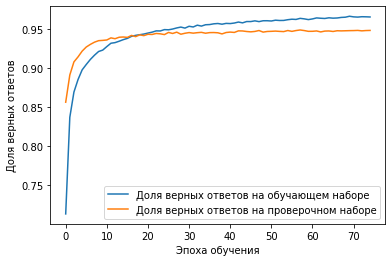

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [0]:
#2 слоя
model = Sequential()
model.add(Dense(1024, input_dim=784, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(49, activation = 'softmax'))


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])

history = model.fit(X_train1, y_train1, batch_size=512, epochs=75, validation_split=0.2, verbose=1)
test_loss, test_acc = model.evaluate(X_test1, y_test1)
print(test_acc)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 185892 samples, validate on 46473 samples
Epoch 1/75





185892/185892 [==============================] - 7s 40us/step - loss: 1.1321 - acc: 0.7027 - val_loss: 0.5760 - val_acc: 0.8439
Epoch 2/75
185892/185892 [==============================] - 3s 15us/step - loss: 0.6545 - acc: 0.8200 - val_loss: 0.4337 - val_acc: 0.8809
Epoch 3/75
185892/185892 [==============================] - 3s 15us/step - loss: 0.5356 - acc: 0.8507 - val_loss: 0.3650 - val_acc: 0.9012
Epoch 4/75
185892/185892 [==============================] - 3s 15us/step - loss: 0.4657 - acc: 0.8680 - val_loss: 0.3290 - val_acc: 0.9083
Epoch 5/75
185892/185892 [==============================] - 3s 15us/step - loss: 0.4174 - acc: 0.8802 - val_loss: 0.3061 - val_acc: 0.9160
Epoch 6/75
185892/185892 [=====

In [0]:
#3 слоя
model = Sequential()
model.add(Dense(1024, input_dim=784, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(49, activation = 'softmax'))


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])

history = model.fit(X_train1, y_train1, batch_size=512, epochs=75, validation_split=0.2, verbose=1)
test_loss, test_acc = model.evaluate(X_test1, y_test1)
print(test_acc)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 185892 samples, validate on 46473 samples
Epoch 1/75





185892/185892 [==============================] - 9s 47us/step - loss: 1.0817 - acc: 0.7136 - val_loss: 0.5224 - val_acc: 0.8563
Epoch 2/75
185892/185892 [==============================] - 3s 16us/step - loss: 0.5853 - acc: 0.8370 - val_loss: 0.3931 - val_acc: 0.8911
Epoch 3/75
185892/185892 [==============================] - 3s 16us/step - loss: 0.4627 - acc: 0.8692 - val_loss: 0.3324 - val_acc: 0.9078
Epoch 4/75
185892/185892 [==============================] - 3s 16us/step - loss: 0.3997 - acc: 0.8853 - val_loss: 0.3037 - val_acc: 0.9142
Epoch 5/75
185892/185892 [==============================] - 3s 16us/step - loss: 0.3546 - acc: 0.8976 - val_loss: 0.2794 - val_acc: 0.9215
Epoch 6/75
185892/185892 [=====

In [0]:
def create_model(dropout_rate=0, dense=256):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1)))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3,3)))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(dense, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(49, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])
    return model

model = KerasClassifier(build_fn=create_model, epochs=25, batch_size=512, verbose=0)

#batch_size = [64, 128, 256, 512]
#epochs = [25, 50, 75, 100]

dropout_rate = [0.3, 0.4, 0.5, 0.6]
dense = [256, 512, 1024]
param_grid = dict(dropout_rate=dropout_rate,dense=dense)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X_train1, y_train1)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where








Best: 0.974704 using {'dense': 1024, 'dropout_rate': 0.6}
0.972061 (0.000781) with: {'dense': 256, 'dropout_rate': 0.3}
0.972117 (0.000597) with: {'dense': 256, 'dropout_rate': 0.4}
0.971446 (0.001149) with: {'dense': 256, 'dropout_rate': 0.5}
0.970908 (0.000311) with: {'dense': 256, 'dropout_rate': 0.6}
0.972216 (0.000128) with: {'dense': 512, 'dropout_rate': 0.3}
0.973322 (0.000627) with: {'dense': 512, 'dropout_rate': 0.4}
0.974028 (0.000589) with: {'dense': 512, 'dropout_rate': 0.5}
0.973774 (0.001180) with: {'dense': 512, 'dropout_rate': 0.6}
0.972319 (0.000470) with: {'dense': 1024, 'dropout_rate': 0.3}
0.972978 (0.000148) with: {'dense': 1024, 'dropout_rate': 0.4}
0.974704 (0.000125) with: {'dense': 1024, 'dropout_rate': 0.5}
0.974704 (0.000665) with: {'dense

In [0]:
#сверточная сеть
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(49, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])

history = model.fit(X_train1, y_train1, batch_size=512, epochs=75, validation_split=0.2, verbose=1)
test_loss, test_acc = model.evaluate(X_test1, y_test1)
print(test_acc)

Train on 185892 samples, validate on 46473 samples
Epoch 1/75
185892/185892 [==============================] - 7s 39us/step - loss: 0.9457 - acc: 0.7504 - val_loss: 0.2909 - val_acc: 0.9199
Epoch 2/75
185892/185892 [==============================] - 6s 35us/step - loss: 0.3608 - acc: 0.8983 - val_loss: 0.1927 - val_acc: 0.9466
Epoch 3/75
185892/185892 [==============================] - 7s 35us/step - loss: 0.2616 - acc: 0.9248 - val_loss: 0.1570 - val_acc: 0.9575
Epoch 4/75
185892/185892 [==============================] - 7s 35us/step - loss: 0.2180 - acc: 0.9370 - val_loss: 0.1402 - val_acc: 0.9619
Epoch 5/75
185892/185892 [==============================] - 7s 35us/step - loss: 0.1877 - acc: 0.9457 - val_loss: 0.1295 - val_acc: 0.9643
Epoch 6/75
185892/185892 [==============================] - 7s 35us/step - loss: 0.1681 - acc: 0.9511 - val_loss: 0.1199 - val_acc: 0.9667
Epoch 7/75
185892/185892 [==============================] - 7s 35us/step - loss: 0.1533 - acc: 0.9553 - val_loss: 0

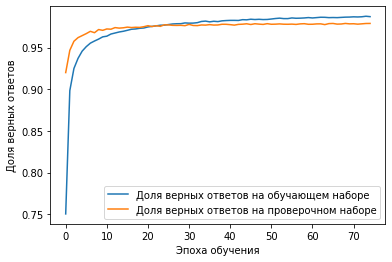

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [0]:
model.save('my_model.h5')
from google.colab import files
files.download('my_model.h5')